## ASSIGNMENT 2

## NYC Property Sales
One year's worth of properties for sale on the NYC real real estate market

### ABOUT DATASET
Records of each building/building unit (apartment, etc.) sold on the New York City property market over a 12 month period.

TUGAS
a. Logistic Regression
b. k-Nearest Neighbor (kNN) algorithm
c. SVM / Supoort Vector Machine algorithm
d. Decision Tree algorithm
e. Random Forest algorithm
f. Naive Bayes algorithm
g. Confussion Matrix
h. Visualization
i. Preprocessing
j. Tanpa error

### IMPORT LIBRARY

In [1]:
import pandas as pd
import numpy as np
import math
import statistics
import scipy.stats
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import t
from scipy.stats import chi2_contingency
from scipy.stats import ttest_ind

### READ DATA

In [2]:
df = pd.read_csv('nyc-rolling-sales.csv')

In [3]:
df.head()

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,...,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
1,5,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,...,28,3,31,4616,18690,1900,2,C7,-,2016-12-14 00:00:00
2,6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,,C7,197 EAST 3RD STREET,...,16,1,17,2212,7803,1900,2,C7,-,2016-12-09 00:00:00
3,7,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,...,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00
4,8,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,...,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00


In [4]:
df.tail()

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
84543,8409,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,34,,B9,37 QUAIL LANE,...,2,0,2,2400,2575,1998,1,B9,450000,2016-11-28 00:00:00
84544,8410,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,78,,B9,32 PHEASANT LANE,...,2,0,2,2498,2377,1998,1,B9,550000,2017-04-21 00:00:00
84545,8411,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7351,60,,B2,49 PITNEY AVENUE,...,2,0,2,4000,1496,1925,1,B2,460000,2017-07-05 00:00:00
84546,8412,5,WOODROW,22 STORE BUILDINGS,4,7100,28,,K6,2730 ARTHUR KILL ROAD,...,0,7,7,208033,64117,2001,4,K6,11693337,2016-12-21 00:00:00
84547,8413,5,WOODROW,35 INDOOR PUBLIC AND CULTURAL FACILITIES,4,7105,679,,P9,155 CLAY PIT ROAD,...,0,1,1,10796,2400,2006,4,P9,69300,2016-10-27 00:00:00


### SEE DATA DESCRIPTION

In [5]:
# Dataframe has 84.548 Rows and 22 Columns
df.shape

(84548, 22)

In [6]:
# View the data for each variable in full
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84548 entries, 0 to 84547
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Unnamed: 0                      84548 non-null  int64 
 1   BOROUGH                         84548 non-null  int64 
 2   NEIGHBORHOOD                    84548 non-null  object
 3   BUILDING CLASS CATEGORY         84548 non-null  object
 4   TAX CLASS AT PRESENT            84548 non-null  object
 5   BLOCK                           84548 non-null  int64 
 6   LOT                             84548 non-null  int64 
 7   EASE-MENT                       84548 non-null  object
 8   BUILDING CLASS AT PRESENT       84548 non-null  object
 9   ADDRESS                         84548 non-null  object
 10  APARTMENT NUMBER                84548 non-null  object
 11  ZIP CODE                        84548 non-null  int64 
 12  RESIDENTIAL UNITS               84548 non-null

In [7]:
# View a list of column headers
df.columns.values

array(['Unnamed: 0', 'BOROUGH', 'NEIGHBORHOOD', 'BUILDING CLASS CATEGORY',
       'TAX CLASS AT PRESENT', 'BLOCK', 'LOT', 'EASE-MENT',
       'BUILDING CLASS AT PRESENT', 'ADDRESS', 'APARTMENT NUMBER',
       'ZIP CODE', 'RESIDENTIAL UNITS', 'COMMERCIAL UNITS', 'TOTAL UNITS',
       'LAND SQUARE FEET', 'GROSS SQUARE FEET', 'YEAR BUILT',
       'TAX CLASS AT TIME OF SALE', 'BUILDING CLASS AT TIME OF SALE',
       'SALE PRICE', 'SALE DATE'], dtype=object)

In [8]:
# View a list of row headers
df.index.values

array([    0,     1,     2, ..., 84545, 84546, 84547], dtype=int64)

In [9]:
# melihat ringkasan kolom setiap kerangka
df.describe()

,Unnamed: 0,BOROUGH,BLOCK,LOT,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,YEAR BUILT,TAX CLASS AT TIME OF SALE
count,84548.000000,84548.000000,84548.000000,84548.000000,84548.000000,84548.000000,84548.000000,84548.000000,84548.000000,84548.000000
mean,10344.359878,2.998758,4237.218976,376.224015,10731.991614,2.025264,0.193559,2.249184,1789.322976,1.657485
std,7151.779436,1.289790,3568.263407,658.136814,1290.879147,16.721037,8.713183,18.972584,537.344993,0.819341
min,4.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4231.000000,2.000000,1322.750000,22.000000,10305.000000,0.000000,0.000000,1.000000,1920.000000,1.000000
50%,8942.000000,3.000000,3311.000000,50.000000,11209.000000,1.000000,0.000000,1.000000,1940.000000,2.000000
75%,15987.250000,4.000000,6281.000000,1001.000000,11357.000000,2.000000,0.000000,2.000000,1965.000000,2.000000
max,26739.000000,5.000000,16322.000000,9106.000000,11694.000000,1844.000000,2261.000000,2261.000000,2017.000000,4.000000


### DATA CLEANING
Delete unnecessary variables and data

### 1. Removed unneeded variable

In [10]:
clean = (["Unnamed: 0",   ])
df.drop(clean, axis=1, inplace=True)

In [11]:
df.head(5)

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,,...,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
1,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,,...,28,3,31,4616,18690,1900,2,C7,-,2016-12-14 00:00:00
2,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,,C7,197 EAST 3RD STREET,,...,16,1,17,2212,7803,1900,2,C7,-,2016-12-09 00:00:00
3,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,,...,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00
4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,,...,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00


### 2. Ganti Tipe Data

In [12]:
Categorical = ["NEIGHBORHOOD","BUILDING CLASS CATEGORY",
                "TAX CLASS AT PRESENT","BUILDING CLASS AT PRESENT",
                "TAX CLASS AT TIME OF SALE","BUILDING CLASS AT TIME OF SALE"]

for col in Categorical:
    df[col]=df[col].astype("category")

In [13]:
# mengubah tipe untuk beberapa kolom menjadi numeric

Numeric = ["BOROUGH","LAND SQUARE FEET",
        "GROSS SQUARE FEET","SALE PRICE" ]

for col in Numeric:
    df[col]=pd.to_numeric(df[col], errors="coerce")

### 3. Check Missing Value

In [14]:
missing = round((df.isnull().sum())/len(df)*100, 2)
missing = (pd.DataFrame((missing)[missing>0]))
missing = missing.rename(columns={0:"percent missing"})
missing

,percent missing
LAND SQUARE FEET,31.05
GROSS SQUARE FEET,32.66
SALE PRICE,17.22


Based on the above results, LAND SQUARE FEET has a missing percentage of 31%, GROSS SQUARE FEET has a missing percentage of 33%, and SALE PRICE has a missing percentage of 17%.

### 4. Drop Missing Value

In [15]:
# drop missing value
df = df.dropna()

In [16]:
# check if there any missing value
df.isnull().any()

BOROUGH                           False
NEIGHBORHOOD                      False
BUILDING CLASS CATEGORY           False
TAX CLASS AT PRESENT              False
BLOCK                             False
LOT                               False
EASE-MENT                         False
BUILDING CLASS AT PRESENT         False
ADDRESS                           False
APARTMENT NUMBER                  False
ZIP CODE                          False
RESIDENTIAL UNITS                 False
COMMERCIAL UNITS                  False
TOTAL UNITS                       False
LAND SQUARE FEET                  False
GROSS SQUARE FEET                 False
YEAR BUILT                        False
TAX CLASS AT TIME OF SALE         False
BUILDING CLASS AT TIME OF SALE    False
SALE PRICE                        False
SALE DATE                         False
dtype: bool

### 5. Check duplicated data

In [17]:
df.duplicated().sum()

348

It is known that there are 348 duplicated data lines, for that we will delete the duplicated data

In [18]:
# drop duplicated data
df.drop_duplicates(inplace=True)

In [19]:
# check again duplicated data
print(sum(df.duplicated()))

0


### 6. Delete Value=0

In [20]:
#delete value 0
df = df[(df["LAND SQUARE FEET"] != 0) & 
            (df["GROSS SQUARE FEET"] != 0) & 
            (df["YEAR BUILT"] > 1700) & 
            (df["SALE PRICE"] > 5000) & 
            (df["TOTAL UNITS"] != 0)
            ]

In [21]:
#see the dataset
df.head(3)

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,,...,5,0,5,1633.0,6440.0,1900,2,C2,6625000.0,2017-07-19 00:00:00
3,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,,...,10,0,10,2272.0,6794.0,1913,2,C4,3936272.0,2016-09-23 00:00:00
4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,,...,6,0,6,2369.0,4615.0,1900,2,C2,8000000.0,2016-11-17 00:00:00


In [22]:
# reset index
df.reset_index(drop=True, inplace=True)
df.head(3)

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,,...,5,0,5,1633.0,6440.0,1900,2,C2,6625000.0,2017-07-19 00:00:00
1,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,,...,10,0,10,2272.0,6794.0,1913,2,C4,3936272.0,2016-09-23 00:00:00
2,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,,...,6,0,6,2369.0,4615.0,1900,2,C2,8000000.0,2016-11-17 00:00:00


### 7. Change the name of borough

In [23]:
df["BOROUGH"] = df["BOROUGH"].map({1:"Manhattan", 
                                   2:"Bronx", 
                                   3:"Brooklyn", 
                                   4:"Queens",
                                   5:"Staten Island"})

### 8. See the distribution of Borough

In [24]:
df_borough= df["BOROUGH"].unique()

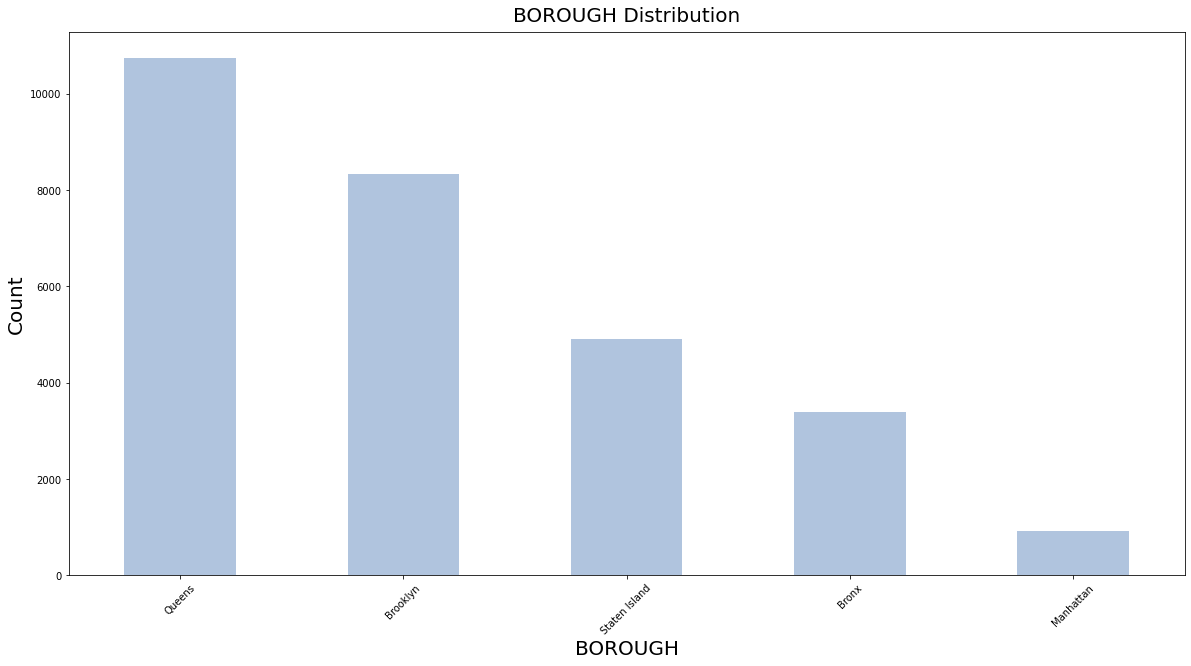

In [26]:
df["BOROUGH"].value_counts().plot(kind='bar',
                                        figsize=(20,10),color="lightsteelblue" )

plt.title("BOROUGH Distribution", pad=10, fontsize = 20)
plt.xlabel("BOROUGH",fontsize = 20)
plt.ylabel("Count",fontsize = 20)

plt.xticks(rotation = 45)

plt.show()

## 1. MEAN
a. What is the average sales per area in New York City?
b. Which class category has the highest average sales?

### a. create a table containing BOROUGH & SALE PRICE

In [27]:
df_borough = df[["BOROUGH","SALE PRICE"]]

In [28]:
df_borough_mean = df_borough.reset_index()[["BOROUGH", 
                                          "SALE PRICE"]].groupby(["BOROUGH"]).mean().sort_values(by="SALE PRICE",
                                           ascending=True)

In [29]:
df_borough_mean

,SALE PRICE
BOROUGH,
Staten Island,5.415304e+05
Queens,9.312022e+05
Bronx,1.055587e+06
Brooklyn,1.559099e+06
Manhattan,2.010283e+07


### b. Make a Bar Chart of Mean

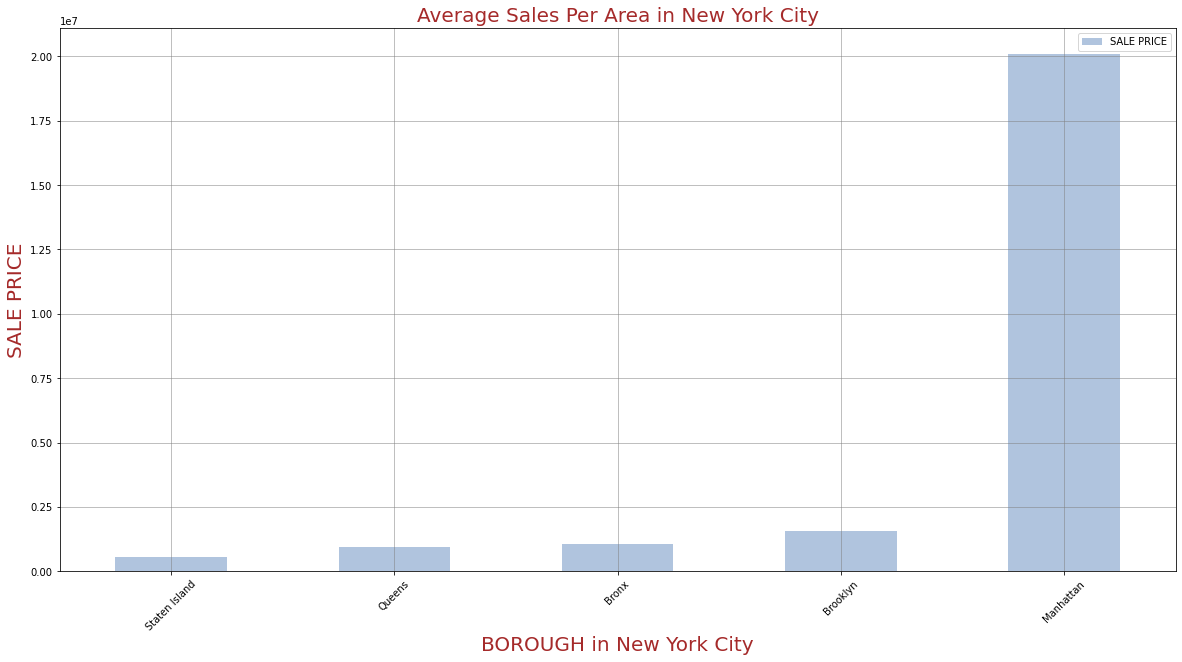

In [30]:
df_borough_mean.plot(kind = 'bar', 
                    figsize=(20,10), 
                    legend = True,color="lightsteelblue")

plt.title("Average Sales Per Area in New York City", fontsize = 20,  color = "brown")

plt.xlabel("BOROUGH in New York City", fontsize = 20,  color = "brown")

plt.ylabel("SALE PRICE", fontsize = 20,  color = "brown")

plt.grid(color="gray", linewidth=0.5)

plt.xticks(rotation = 45)

# menampilkan bar chart
plt.show()

Conclusion :
Based on the bar chart display, the Manhattan area has the HIGHEST average sales, while Staten Island is the region with the LOWEST average sales.

### c. There are 29 Building Class Categories

In [31]:
df["BUILDING CLASS CATEGORY"].nunique()

29

### d. create a table containing BUILDING CLASS CATEGORY & SALE PRICE

In [32]:
df_building= df[["BUILDING CLASS CATEGORY","SALE PRICE"]]

In [33]:
# displays 5 categories of building classes that have the highest average selling price

top5 = df_building.groupby("BUILDING CLASS CATEGORY").mean().sort_values(by="SALE PRICE", ascending=True)
top5 = top5.head(5)

In [34]:
top5

,SALE PRICE
BUILDING CLASS CATEGORY,
06 TAX CLASS 1 - OTHER,576228.750000
01 ONE FAMILY DWELLINGS,671601.302353
05 TAX CLASS 1 VACANT LAND,767020.166667
02 TWO FAMILY DWELLINGS,807011.071429
10 COOPS - ELEVATOR APARTMENTS,913460.593750


### e. Show the Bar Chart

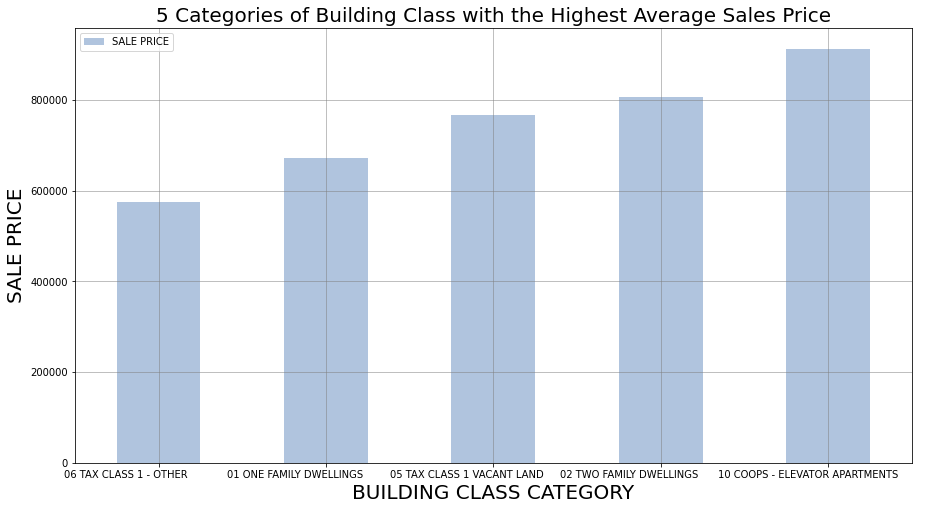

In [35]:
top5.plot(kind='bar', figsize=(15,8), color="lightsteelblue")

plt.title("5 Categories of Building Class with the Highest Average Sales Price", fontsize=20)

plt.xlabel("BUILDING CLASS CATEGORY", fontsize = 20)

plt.ylabel("SALE PRICE", fontsize = 20)

plt.grid(color="gray", linewidth=0.5)

plt.xticks(rotation = 0)

plt.show()

Based on the bar chart view..
The "10 COOPS-ELEVATOR APARTMENTS" category has the highest average selling price.
Category "06 TAX CLASS 1-OTHER" has the lowest average selling price.

The order is as follows:
1. 10 COOPS-ELEVATOR APARTMENTS
2. 02 HOUSE OF TWO FAMILY
3. 05 KOOS LAND CLASS 1 TAX
4. 01 ONE FAMILY RESIDENCE
5. 06 OTHER CLASS 1 TAXES

It can be concluded that the building class category affects the average selling price of the building.

## 2. MEDIAN
What is the median value in each region?

### a. Displays the BOROUGH & SALE PRICE table

In [36]:
df_borough = df[["BOROUGH","SALE PRICE"]]

In [37]:
# display a table whose medians are in ascending order
df_borough_median = df_borough.reset_index()[["BOROUGH", 
                                          "SALE PRICE"]].groupby(["BOROUGH"]).median().sort_values(by="SALE PRICE",
                                           ascending=True)

In [38]:
df_borough_median

,SALE PRICE
BOROUGH,
Bronx,490000.0
Staten Island,490000.0
Queens,645451.0
Brooklyn,880000.0
Manhattan,6800000.0


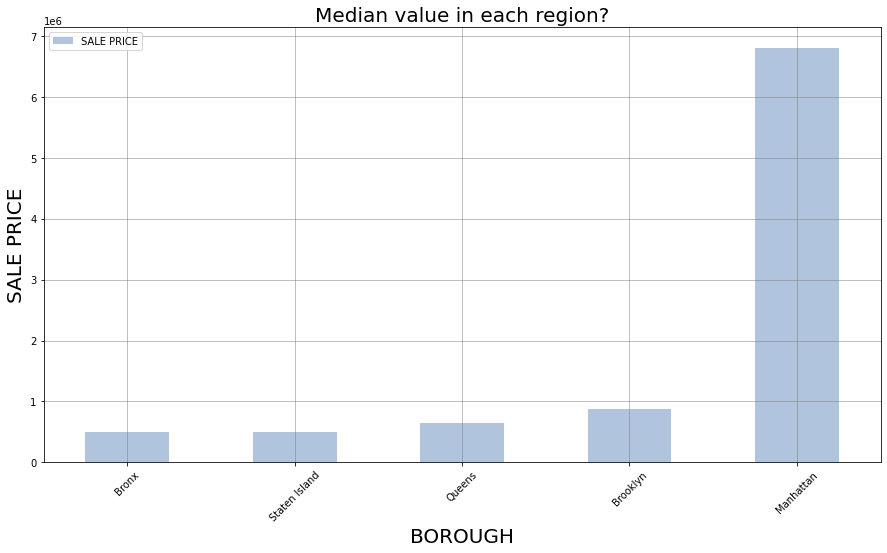

In [39]:
df_borough_median.plot(kind='bar', figsize=(15,8), color="lightsteelblue")

plt.title("Median value in each region?", fontsize=20)

plt.xlabel("BOROUGH", fontsize = 20)

plt.ylabel("SALE PRICE", fontsize = 20)

plt.grid(color="gray", linewidth=0.5)

plt.xticks(rotation = 45)

plt.show()

CONCLUSION :
Based on the above results...
- The Bronx and Staten Island region has a median value of 490000
- Queens region has a median value of 645475.5
- The Brooklyn area has a median value of 880000
- The Manhattan area has a median value of 6800000

## 3. MODUS

In [40]:
for BOROUGH in df_borough:
    print(f"{BOROUGH}\t{df[df['BOROUGH'] == BOROUGH]['SALE PRICE'].mode()[0]}")

KeyError: 0

The output doesn't show numbers, so can't give conclusions

## 4. RANGE

In [52]:
print(f"BOROUGH \tMIN\tMAX\t\tRANGE") 
print()

for BOROUGH in df_borough:
    minx = df[df["BOROUGH"] == BOROUGH]["SALE PRICE"].min()
    maxx = df[df["BOROUGH"] == BOROUGH]["SALE PRICE"].max()
    
    print(f"{BOROUGH}\t{minx}\t{maxx}\t{maxx-minx}")

BOROUGH 	MIN	MAX		RANGE

BOROUGH	nan	nan	nan
SALE PRICE	nan	nan	nan


The output doesn't show numbers, so can't give conclusions

## 5. VARIANCE
What is the variance in the 5 NYC areas?

In [43]:
df.groupby(["BOROUGH"]).var()["SALE PRICE"]

BOROUGH
Bronx            1.488592e+13
Brooklyn         2.310412e+13
Manhattan        8.399772e+15
Queens           1.410351e+13
Staten Island    2.162773e+11
Name: SALE PRICE, dtype: float64

Based on the above results,
Variance values in the 'Manhattan' Region have a larger selling price range.
Variance values in the 'Staten Island' area have a smaller selling price range.

## 6. STANDART DEVIATION/SIMPANGAN BAKU
How is the 'sales price' data distributed in each region?

In [44]:
df.groupby(["BOROUGH"]).std()["SALE PRICE"]

BOROUGH
Bronx            3.858228e+06
Brooklyn         4.806675e+06
Manhattan        9.165027e+07
Queens           3.755464e+06
Staten Island    4.650562e+05
Name: SALE PRICE, dtype: float64

Based on the above results,
STANDART DEVIATION / DIFFERENCES in each region is different.
If we look at the data, the 'Manhattan' Region has a more varied value of the 'SALE PRICE' data spread than the other 4 regions.

## 7. PROBABILITY DISTRIBUTION
What is the Probability Distribution of SALE PRICE?

In [45]:
z = np.abs(stats.zscore(df["SALE PRICE"])).sort_values()
filtered = z < 3

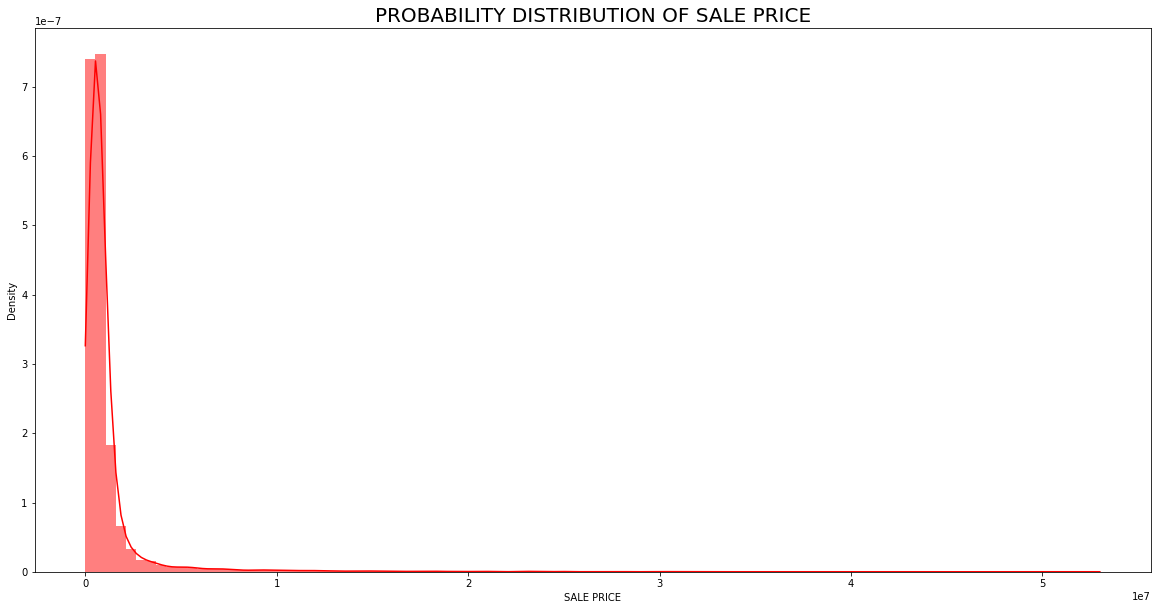

In [46]:
plt.figure(figsize=(20, 10))
sns.histplot(df.loc[filtered, :]["SALE PRICE"], 
             color="red", bins=100, 
             kde=True, 
             stat="density", 
             linewidth=0);
plt.title("PROBABILITY DISTRIBUTION OF SALE PRICE", fontsize = 20)
plt.show()

Using filtering i.e. z-score > 3 is removed.
The SALE PRICE distribution has a positive slope to the left.
From the shape of the distribution, it is predicted that it will be distributed in the form of a gamma distribution or it can also be exponential.

## 8. CONFIDENCE INTERVAL

What is the confidence interval of the 'sale price' in the NYC area?

In [47]:
x = df["SALE PRICE"] 

m = x.mean()
s = x.std()
dof = len(x)-1

confidence = 0.95 
t_crit = np.abs(t.ppf((1-confidence)/2,dof))

values = np.round((m-s*t_crit/np.sqrt(len(x)), m+s*t_crit/np.sqrt(len(x))), 2)

print(values)

[1486437.6 1889238.4]


Based on the above results,
The average selling price in the NYC area is between 1,486,384 USD to 1,889,239 USD with a confidence interval of 0.95 or 95%.

## 9. Hypothesis Testing

Make hypothesis testing between LAND SQUARE FEET and SALE PRICE.

This assumption will prove whether 'LAND SQUARE FEET' affects 'SALE PRICE'.

Using the CHI-SQUARE test with the following hypothesis:

H0: "LAND SQUARE FEET does not affect the value of SALE PRICE"

H1: "LAND SQUARE FEET affects the value of SALE PRICE"

If the p-value is less than 0.05:
H0 is rejected and H1 is accepted

If the p-value is less than 0.05:
H0 is accepted and H1 is rejected

In [48]:
df_hipothesis= [df["LAND SQUARE FEET"], df["SALE PRICE"]] 

stat, p, dof, expected = chi2_contingency(df_hipothesis)

print("stat=%.3f, p=%.3f" % (stat, p))

if p > 0.05:
    print("Probably Independent")
else:
    print("Probably Dependent")

stat=3708431089.998, p=0.000
Probably Dependent


Based on the above results,

By using the CHI-SQUARE Test Analysis,
It is known that the p-value is less than (<) 0.05, which is 0.000, which means:

'H0 rejected and H1 accepted'

Thus, 'LAND SQUARE FEET' affects the value of 'SALE PRICE'.

## CONCLUSION :

- The Manhattan area has the highest average sales compared to any other area in New York City.

- The Staten Island area has the lowest average sales compared to any other area in New York City.

- 'LAND SQUARE FEET' affects 'SALE PRICE'

- The average SALE PRICE in the NYC area is between 1,486,384 USD to 1,889,239 USD with a confidence interval of 0.95 or 95%.

- For 'BUILDING CLASS CATEGORY',
"10 COOPS-ELEVATOR APARTMENTS" category has the highest average selling price. Category "06 TAX CLASS 1-OTHER" has the lowest average selling price.

The order is as follows:

10 COOPS-ELEVATOR APARTMENTS
02 HOUSE OF TWO FAMILY
05 KOOS LAND CLASS 1 TAX
01 ONE FAMILY RESIDENCE
06 OTHER CLASS 1 TAXES

It can be concluded that the building class category affects the average selling price of the building.